# Workgroup - group 3

## **Math Demonstrations**

### 1. Prove the Frisch-Waugh-Lovell theorem

Given the model:
\begin{align*}
y &= D \beta_1 + W \beta_2 + \mu
\end{align*}
where $y$ is an $n \times 1$ vector, $D$ is an $n \times k_1$ matrix, $\beta_1$ is a $k_1 \times 1$ vector, $W$ is an $n \times k_2$ matrix, $\beta_2$ is a $k_2 \times 1$ vector, and $\mu$ is an $n \times 1$ vector of error terms.

We can construct the following equation:

\begin{align*}
\epsilon_y &= \epsilon_D \phi + \xi
\end{align*}

Running $y$ on $W$, we get:

\begin{align*}
y &= W\hat{\alpha}_1 + \epsilon_y \iff \epsilon_y &= y - W\hat{\alpha}_1
\end{align*}

Similarly, running $D$ on $W$ gives us:

\begin{align*}
D &= W\hat{\alpha}_2 + \epsilon_D \iff \epsilon_D &= D - W\hat{\alpha}_2
\end{align*}

Running $\epsilon_y$ on $\epsilon_D$:
\begin{align*}
y - W \hat{\alpha}_1 &= (D - W \hat{\alpha}_2) \phi + \xi \\
y &= W \hat{\alpha}_1 + (D - W \hat{\alpha}_2) \phi + \xi \\
y &= W \hat{\alpha}_1 + D \phi - W \hat{\alpha}_2 \phi + \xi \\
y &= D \phi + W (\hat{\alpha}_1 - \hat{\alpha}_2 \phi) + \xi
\end{align*}

Comparing the original model with this, we can see that:
\begin{align*}
    \beta_1 &= \phi \\
    \beta_2 &= \hat{\alpha}_1 - \hat{\alpha}_2 \phi \\
    \mu &= \xi
\end{align*}

### 2. Show that the Conditional Expectation Function minimizes expected squared error

Given the model:
\begin{align*}
Y &= m(X) + e
\end{align*}
where $m(X)$ represents the conditional expectation of $Y$ on $X$. Let's define an arbitrary model:
\begin{align*}
Y &= g(X) + w
\end{align*}
where $g(X)$ represents any function of $X$.

Working with the expected squared error from the arbitrary model:
\begin{align*}
E[(Y-g(X))^2] &= E[(Y-m(X) + m(X)-g(X))^2] \\
&= E[(Y-m(X))^2 + 2(Y-m(X))(m(X)-g(X)) + (m(X)-g(X))^2] \\
&= E[e^2] + 2E[(Y-m(X))(m(X)-g(X))] + E[(m(X)-g(X))^2]
\end{align*}
Using the law of iterated expectations:
\begin{align*}
E[(Y-g(X))^2] &= E[e^2] + 2E[E[(Y-m(X))(m(X)-g(X)) | X]] + E[(m(X)-g(X))^2]
\end{align*}
Since $m(X)$ and $g(X)$ are functions of $X$, the term $(m(X)-g(X))$ can be thought of as constant when conditioning on $X$. Thus:
\begin{align*}
E[(Y-g(X))^2] &= E[e^2] + 2E[E[Y-m(X) | X](m(X)-g(X))] + E[(m(X)-g(X))^2]
\end{align*}
It is important to note that $E[Y-m(X) | X] = 0$ by definition of $m(X)$, so we get:
\begin{align*}
E[(Y-g(X))^2] &= E[e^2] + E[(m(X)-g(X))^2]
\end{align*}
Because the second term in the equation is always non-negative, it is clear that the function is minimized when $g(X)$ equals $m(X)$. In which case:
\begin{align*}
E[(Y-g(X))^2] &= E[e^2]
\end{align*}

## **Replication 1 - Code**

In the previous lab, we already analyzed data from the March Supplement of the U.S. Current Population Survey (2015) and answered the question how to use job-relevant characteristics, such as education and experience, to best predict wages. Now, we focus on the following inference question:

What is the difference in predicted wages between men and women with the same job-relevant characteristics?

Thus, we analyze if there is a difference in the payment of men and women (*gender wage gap*). The gender wage gap may partly reflect *discrimination* against women in the labor market or may partly reflect a *selection effect*, namely that women are relatively more likely to take on occupations that pay somewhat less (for example, school teaching).

To investigate the gender wage gap, we consider the following log-linear regression model

\begin{align}
\log(Y) &= \beta'X + \epsilon\\
&= \beta_1 D  + \beta_2' W + \epsilon,
\end{align}

where $D$ is the indicator of being female ($1$ if female and $0$ otherwise) and the
$W$'s are controls explaining variation in wages. Considering transformed wages by the logarithm, we are analyzing the relative difference in the payment of men and women.

### Data analysis

We consider the same subsample of the U.S. Current Population Survey (2015) as in the previous lab. Let us load the data set.

In [1]:
import pandas as pd
import numpy as np
import pyreadr as rr # package to use data form R format
import math

In [2]:
#!pip install pyreadr==0.4.2

In [2]:
rdata_read = rr.read_r(r"../../data/wage2015_subsample_inference.Rdata")


# Extracting the data frame from rdata_read
data = rdata_read[ 'data' ]


data.shape

(5150, 20)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5150 entries, 10 to 32643
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   wage    5150 non-null   float64 
 1   lwage   5150 non-null   float64 
 2   sex     5150 non-null   float64 
 3   shs     5150 non-null   float64 
 4   hsg     5150 non-null   float64 
 5   scl     5150 non-null   float64 
 6   clg     5150 non-null   float64 
 7   ad      5150 non-null   float64 
 8   mw      5150 non-null   float64 
 9   so      5150 non-null   float64 
 10  we      5150 non-null   float64 
 11  ne      5150 non-null   float64 
 12  exp1    5150 non-null   float64 
 13  exp2    5150 non-null   float64 
 14  exp3    5150 non-null   float64 
 15  exp4    5150 non-null   float64 
 16  occ     5150 non-null   category
 17  occ2    5150 non-null   category
 18  ind     5150 non-null   category
 19  ind2    5150 non-null   category
dtypes: category(4), float64(16)
memory usage: 736.3+ KB


***Variable description***

- occ : occupational classification
- ind : industry classification
- lwage : log hourly wage
- sex : gender (1 female) (0 male)
- shs : some high school
- hsg : High school graduated
- scl : Some College
- clg: College Graduate
- ad: Advanced Degree
- ne: Northeast
- mw: Midwest
- so: South
- we: West
- exp1: experience

### Filtering data to focus on college-advanced-educated workers

In [5]:
data = data[(data['scl'] == 1) | (data['clg'] == 1) | (data['ad'] == 1)]

### Exploratory Data Analysis

In [6]:
data[['occ','occ2','ind','ind2']].describe()

,occ,occ2,ind,ind2
count,3774,3774,3774,3774
unique,330,22,222,21
top,4700,1,7860,18
freq,125,510,220,547


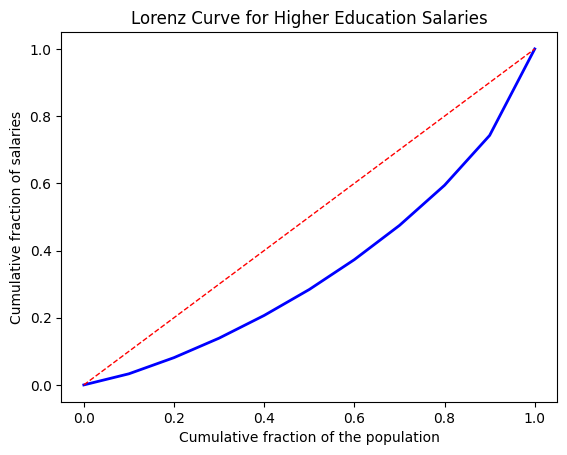

In [7]:
import numpy as np
import matplotlib.pyplot as plt


wage_sorted = np.sort(data['wage'])
cumulative_sum = np.cumsum(wage_sorted)
deciles = np.percentile(cumulative_sum, np.arange(0, 101, 10))
population_fraction = np.arange(0, 1.1, 0.1)

salary_fraction = np.percentile(deciles / np.sum(data['wage']), np.arange(0, 101, 10))


plt.plot(population_fraction, salary_fraction, linewidth=2, color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', linewidth=1, color='red')  


plt.title("Lorenz Curve for Higher Education Salaries")
plt.xlabel("Cumulative fraction of the population")
plt.ylabel("Cumulative fraction of salaries")


plt.show()


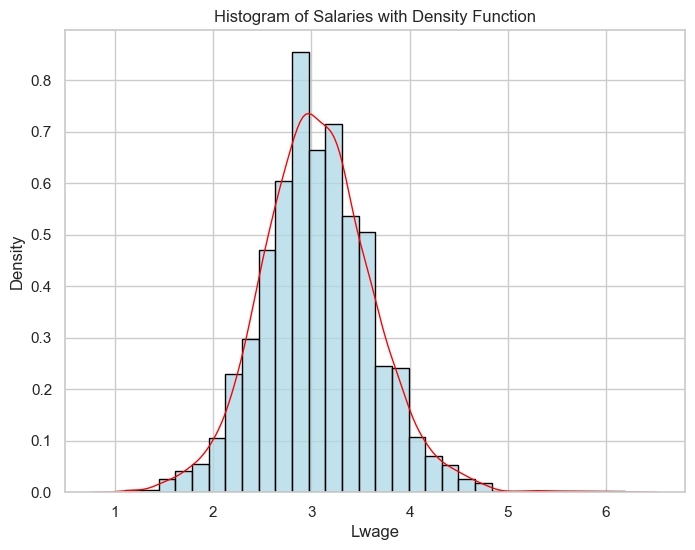

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.histplot(data['lwage'], bins=30, kde=False, color='lightblue', edgecolor='black', stat='density')
plt.title('Histogram of Salaries with Density Function')
plt.xlabel('Lwage')
plt.ylabel('Density')

sns.kdeplot(data['lwage'], color='red', linewidth=1)

plt.show()

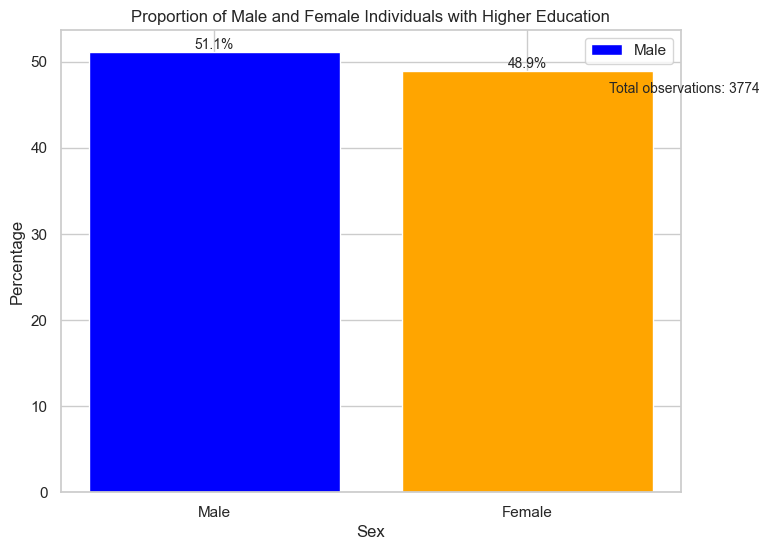

In [10]:
import matplotlib.pyplot as plt

# Calcular las proporciones de sexos
proportions = data['sex'].value_counts(normalize=True) * 100

# Crear un data frame para el gráfico
plot_data = pd.DataFrame({'sex': ['Male', 'Female'], 'proportion': proportions})

# Obtener el número total de observaciones
total_observations = len(data)

# Graficar las proporciones de sexos
plt.figure(figsize=(8, 6))
bars = plt.bar(plot_data['sex'], plot_data['proportion'], color=['blue', 'orange'])
plt.title('Proportion of Male and Female Individuals with Higher Education')
plt.xlabel('Sex')
plt.ylabel('Percentage')

# Agregar etiquetas de porcentaje en las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

# Agregar el número total de observaciones
plt.text(1.5, max(plot_data['proportion']) * 0.9, f'Total observations: {total_observations}', ha='center', va='bottom', fontsize=10)

legend_labels = ['Male', 'Female']

# Use the custom labels for the legend
plt.legend(labels=legend_labels, loc='upper right')
plt.show()

C:\Users\Matias Villalba\AppData\Local\Temp\ipykernel_2932\1836483406.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Education_Status'] = data.apply(lambda row: 'Some College' if row['scl'] == 1


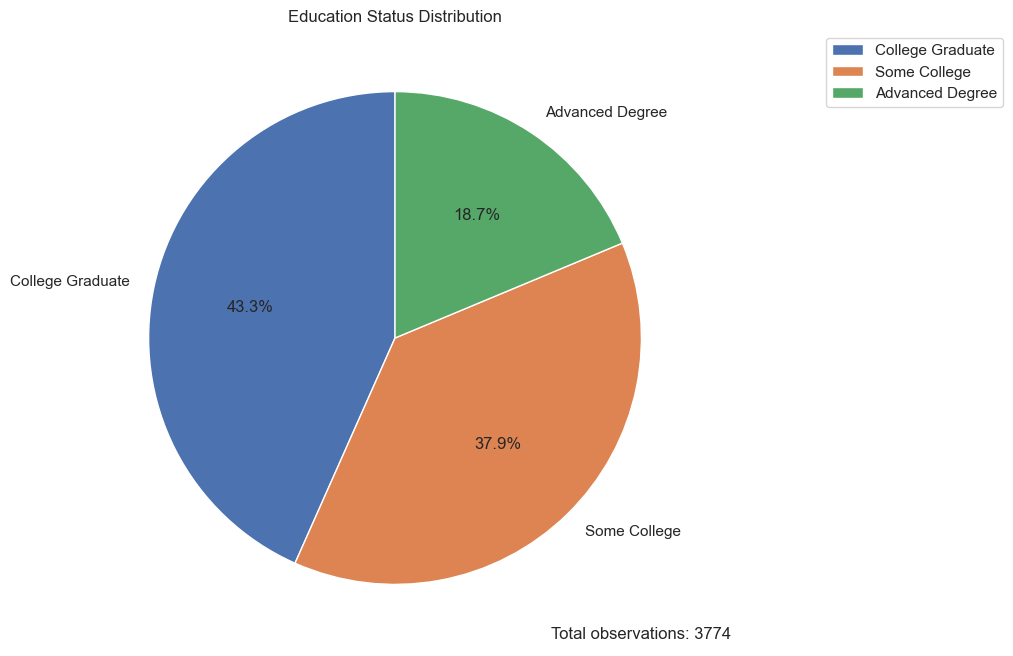

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

data['Education_Status'] = data.apply(lambda row: 'Some College' if row['scl'] == 1
                                      else ('College Graduate' if row['clg'] == 1
                                            else 'Advanced Degree'), axis=1)


edu_freq = data['Education_Status'].value_counts().reset_index()
edu_freq.columns = ['Education_Status', 'Frequency']

total_obs = edu_freq['Frequency'].sum()
edu_freq['Percentage'] = edu_freq['Frequency'] / total_obs * 100

plt.figure(figsize=(8, 8))
plt.pie(edu_freq['Frequency'], labels=edu_freq['Education_Status'], autopct='%1.1f%%', startangle=90)
plt.title('Education Status Distribution')
plt.legend(edu_freq['Education_Status'], loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.text(1, -1.2, f'Total observations: {total_obs}', horizontalalignment='center', verticalalignment='center')
plt.show()

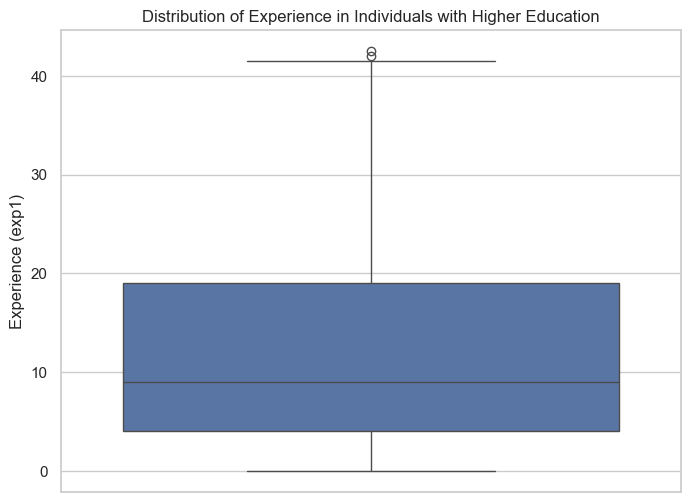

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.boxplot(y='exp1', data=data)
plt.title('Distribution of Experience in Individuals with Higher Education')
plt.ylabel('Experience (exp1)')
plt.show()


To start our (causal) analysis, we compare the sample means given gender:

In [13]:
Z = data[ ["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] ]

data_female = data[data[ 'sex' ] == 1 ]
Z_female = data_female[ ["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] ]

data_male = data[ data[ 'sex' ] == 0 ]
Z_male = data_male[ [ "lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1" ] ]


table = np.zeros( (12, 3) )
table[:, 0] = Z.mean().values
table[:, 1] = Z_male.mean().values
table[:, 2] = Z_female.mean().values
table_pandas = pd.DataFrame( table, columns = [ 'All', 'Men', 'Women']) # from table to dataframe
table_pandas.index = ["Log Wage","Sex","Some High School","High School Graduate","Some College","Gollage Graduate","Advanced Degree", "Northeast","Midwest","South","West","Experience"]
table_html = table_pandas.to_html() # html format

table_pandas

,All,Men,Women
Log Wage,3.062748,3.099449,3.024417
Sex,0.489136,0.000000,1.000000
Some High School,0.000000,0.000000,0.000000
High School Graduate,0.000000,0.000000,0.000000
Some College,0.379438,0.405602,0.352113
Gollage Graduate,0.433492,0.436203,0.430661
Advanced Degree,0.187069,0.158195,0.217226
Northeast,0.229200,0.219917,0.238895
Midwest,0.249868,0.245851,0.254063
South,0.298357,0.303423,0.293066


In [15]:
print( table_html )

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>All</th>
      <th>Men</th>
      <th>Women</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Log Wage</th>
      <td>3.062748</td>
      <td>3.099449</td>
      <td>3.024417</td>
    </tr>
    <tr>
      <th>Sex</th>
      <td>0.489136</td>
      <td>0.000000</td>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>Some High School</th>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>High School Graduate</th>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>Some College</th>
      <td>0.379438</td>
      <td>0.405602</td>
      <td>0.352113</td>
    </tr>
    <tr>
      <th>Gollage Graduate</th>
      <td>0.433492</td>
      <td>0.436203</td>
      <td>0.430661</td>
    </tr>
    <tr>
      <th>Advanced Degree</th>
      <td>0.187069</td>
      <td>0.158195</td>
      

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>All</th>
      <th>Men</th>
      <th>Women</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Log Wage</th>
      <td>3.062748</td>
      <td>3.099449</td>
      <td>3.024417</td>
    </tr>
    <tr>
      <th>Sex</th>
      <td>0.489136</td>
      <td>0.000000</td>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>Some High School</th>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>High School Graduate</th>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>Some College</th>
      <td>0.379438</td>
      <td>0.405602</td>
      <td>0.352113</td>
    </tr>
    <tr>
      <th>Gollage Graduate</th>
      <td>0.433492</td>
      <td>0.436203</td>
      <td>0.430661</td>
    </tr>
    <tr>
      <th>Advanced Degree</th>
      <td>0.187069</td>
      <td>0.158195</td>
      <td>0.217226</td>
    </tr>
    <tr>
      <th>Northeast</th>
      <td>0.229200</td>
      <td>0.219917</td>
      <td>0.238895</td>
    </tr>
    <tr>
      <th>Midwest</th>
      <td>0.249868</td>
      <td>0.245851</td>
      <td>0.254063</td>
    </tr>
    <tr>
      <th>South</th>
      <td>0.298357</td>
      <td>0.303423</td>
      <td>0.293066</td>
    </tr>
    <tr>
      <th>West</th>
      <td>0.222576</td>
      <td>0.230809</td>
      <td>0.213976</td>
    </tr>
    <tr>
      <th>Experience</th>
      <td>12.510201</td>
      <td>12.202282</td>
      <td>12.831798</td>
    </tr>
  </tbody>
</table>

In particular, the table above shows that the difference in average *logwage* between men and women is equal to $0,075$

In [16]:
data_female['lwage'].mean()- data_male['lwage'].mean()

-0.07503200512595809

Thus, the unconditional gender wage gap is about $7,5$\% for the group of never married workers (women get paid less on average in our sample). We also observe that never married working women are relatively more educated than working men and have lower working experience.

This unconditional (predictive) effect of gender equals the coefficient $\beta$ in the univariate ols regression of $Y$ on $D$:

\begin{align}
\log(Y) &=\beta D + \epsilon.
\end{align}

We verify this by running an ols regression in R.

In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [19]:
nocontrol_model = smf.ols( formula = 'lwage ~ sex', data = data )
nocontrol_est = nocontrol_model.fit().summary2().tables[1]['Coef.']['sex']
nocontrol_est
nocontrol_se2 = nocontrol_model.fit().summary2().tables[1]['Std.Err.']['sex']


# robust standar erros
HCV_coefs = nocontrol_model.fit().cov_HC0
nocontrol_se = np.power( HCV_coefs.diagonal() , 0.5)[1]
nocontrol_se

# print unconditional effect of gender and the corresponding standard error

print( f'The estimated gender coefficient is {nocontrol_est} and the corresponding standard error is {nocontrol_se2}' )
print( f'The estimated gender coefficient is {nocontrol_est} and the corresponding robust standard error is {nocontrol_se}','\n' )

The estimated gender coefficient is -0.07503200512595737 and the corresponding standard error is 0.018373837141543274
The estimated gender coefficient is -0.07503200512595737 and the corresponding robust standard error is 0.01834260093480716 



Next, we run an ols regression of $Y$ on $(D,W)$ to control for the effect of covariates summarized in $W$:

\begin{align}
\log(Y) &=\beta_1 D  + \beta_2' W + \epsilon.
\end{align}

Here, we are considering the flexible model from the previous lab. Hence, $W$ controls for experience, education, region, and occupation and industry indicators plus transformations and two-way interactions.

Let us run the ols regression with controls.

### Ols regression with controls

In [20]:
flex = 'lwage ~ sex + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)'

# The smf api replicates R script when it transform data
control_model = smf.ols( formula = flex, data = data )
control_est = control_model.fit().summary2().tables[1]['Coef.']['sex']

print(control_model.fit().summary2().tables[1])

HCV_coefs = control_model.fit().cov_HC0
control_se = np.power( HCV_coefs.diagonal() , 0.5)[42]  # error standard for sex's coefficients 

control_se


print( f"Coefficient for OLS with controls {control_est} and the corresponding robust standard error is {control_se}" )

# confidence interval
control_model.fit().conf_int( alpha=0.05 ).loc[['sex']]


               Coef.  Std.Err.          t         P>|t|    [0.025    0.975]
Intercept   3.350844  0.319263  10.495548  2.129350e-25  2.724885  3.976803
occ2[T.10]  0.009382  0.166232   0.056436  9.549973e-01 -0.316539  0.335302
occ2[T.11] -0.574719  0.340497  -1.687883  9.152172e-02 -1.242308  0.092871
occ2[T.12] -0.132992  0.265391  -0.501117  6.163196e-01 -0.653326  0.387342
occ2[T.13] -0.267986  0.251119  -1.067169  2.859685e-01 -0.760338  0.224366
...              ...       ...        ...           ...       ...       ...
exp4:scl    0.024112  0.025867   0.932148  3.513237e-01 -0.026604  0.074829
exp4:clg    0.008900  0.023652   0.376285  7.067278e-01 -0.037473  0.055273
exp4:mw     0.012197  0.022784   0.535335  5.924519e-01 -0.032474  0.056868
exp4:so     0.006360  0.019596   0.324536  7.455511e-01 -0.032061  0.044780
exp4:we     0.033250  0.020541   1.618716  1.055976e-01 -0.007023  0.073524

[246 rows x 6 columns]
Coefficient for OLS with controls -0.06763389814419515 and the c

,0,1
sex,-0.101899,-0.033369


In [21]:
control_model 

The estimated regression coefficient $\beta_1\approx-0.0676$ measures how our linear prediction of wage changes if we set the gender variable $D$ from 0 to 1, holding the controls $W$ fixed.
We can call this the *predictive effect* (PE), as it measures the impact of a variable on the prediction we make. Overall, we see that the unconditional wage gap of size $4$\% for women increases to about $7$\% after controlling for worker characteristics.  


Next, we are using the Frisch-Waugh-Lovell theorem from the lecture partialling-out the linear effect of the controls via ols.

### Partialling-Out using ols

In [25]:
# models
# model for Y
flex_y = 'lwage ~  (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)'
# model for D
flex_d = 'sex ~ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)' 

# partialling-out the linear effect of W from Y
t_Y = smf.ols( formula = flex_y , data = data ).fit().resid

# partialling-out the linear effect of W from D
t_D = smf.ols( formula = flex_d , data = data ).fit().resid


data_res = pd.DataFrame( np.vstack(( t_Y.values , t_D.values )).T , columns = [ 't_Y', 't_D' ] )


# regression of Y on D after partialling-out the effect of W
partial_fit =  smf.ols( formula = 't_Y ~ t_D' , data = data_res ).fit()
partial_est = partial_fit.summary2().tables[1]['Coef.']['t_D']


# standard error
HCV_coefs = partial_fit.cov_HC0
partial_se = np.power( HCV_coefs.diagonal() , 0.5)[1]

print( f"Coefficient for D via partialling-out {partial_est} and the corresponding robust standard error is {partial_se}" )

# confidence interval
partial_fit.conf_int( alpha=0.05 ).loc[['t_D']]


Coefficient for D via partialling-out -0.0676338981441926 and the corresponding robust standard error is 0.0167653606295368


,0,1
t_D,-0.100823,-0.034445


Again, the estimated coefficient measures the linear predictive effect (PE) of $D$ on $Y$ after taking out the linear effect of $W$ on both of these variables. This coefficient equals the estimated coefficient from the ols regression with controls.

We know that the partialling-out approach works well when the dimension of $W$ is low
in relation to the sample size $n$. When the dimension of $W$ is relatively high, we need to use variable selection
or penalization for regularization purposes. 


Next, we summarize the results.

C:\Users\Matias Villalba\AppData\Local\Temp\ipykernel_2932\2694192782.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Partialling out': partial_fit.params[0]}
C:\Users\Matias Villalba\AppData\Local\Temp\ipykernel_2932\2694192782.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Partialling out': partial_fit.bse[0]}


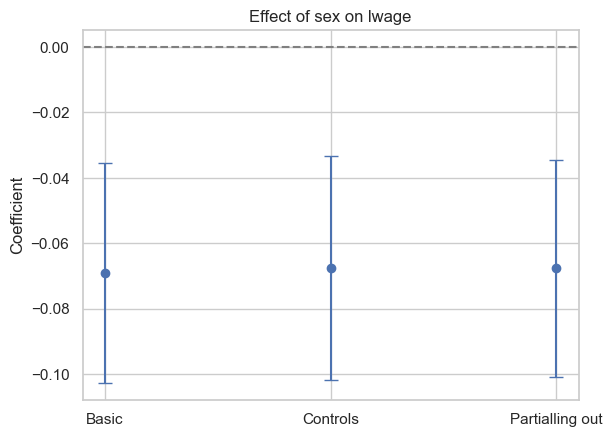

In [27]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
import numpy as np

# Ajustar los modelos
flex_y = 'lwage ~ (exp1+exp2+exp3+exp4)*(scl+clg+ad+occ2+ind2+mw+so+we)'  # model for Y
flex_d = 'sex ~ (exp1+exp2+exp3+exp4)*(scl+clg+ad+occ2+ind2+mw+so+we)'  # model for D

# partialling-out the linear effect of W from Y
t_Y = sm.OLS.from_formula(flex_y, data=data).fit().resid
# partialling-out the linear effect of W from D
t_D = sm.OLS.from_formula(flex_d, data=data).fit().resid

# Ajustar los modelos
basic_fit = sm.OLS.from_formula('lwage ~ sex + exp1 + scl + clg +ad+ mw + so + we + occ2+ ind2', data=data).fit()
control_fit = sm.OLS.from_formula('lwage ~ sex + (exp1+exp2+exp3+exp4)*(scl+clg+ad+occ2+ind2+mw+so+we)', data=data).fit()
partial_fit = sm.OLS(t_Y, t_D).fit()

coefs = {'Basic': basic_fit.params['sex'],
         'Controls': control_fit.params['sex'],
         'Partialling out': partial_fit.params[0]}

ses = {'No Controls': basic_fit.bse['sex'],
       'Controls': control_fit.bse['sex'],
       'Partialling out': partial_fit.bse[0]}

plt.errorbar(coefs.keys(), coefs.values(), yerr=1.96 * np.array(list(ses.values())), fmt='o', capsize=5)
plt.axhline(y=0, color='gray', linestyle='--')
plt.ylabel('Coefficient')
plt.title('Effect of sex on lwage')
plt.show()

The coefficient associated with the gender variable, which indicates the prediction of being female on salary, is initially negative. This suggests that, on average, women have lower salaries than men. However, after adding these controls, such as work experience or educational level, the negative coefficient associated with the gender variable becomes  less negative.

This change in the gender coefficient could be explained by the fact that the control variables are capturing some of the variability in salaries that was previously incorrectly attributed to gender. This suggests that additional factors, beyond gender, are influencing salaries, and the impact of gender on salaries is less pronounced once these other variables are taken into account. Besides, both FWL and including control  variables in the regression model yield coefficient estimates for the variable of interest that reflect its net impact on the dependent variable, once the effects of other explanatory variables have been taken into account.

### Women and male graph (quartic)

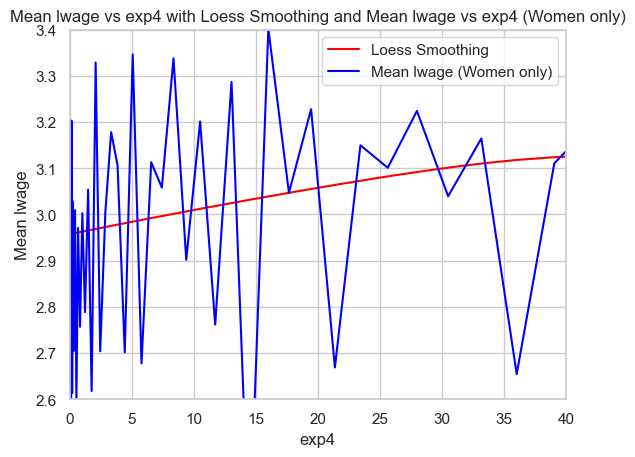

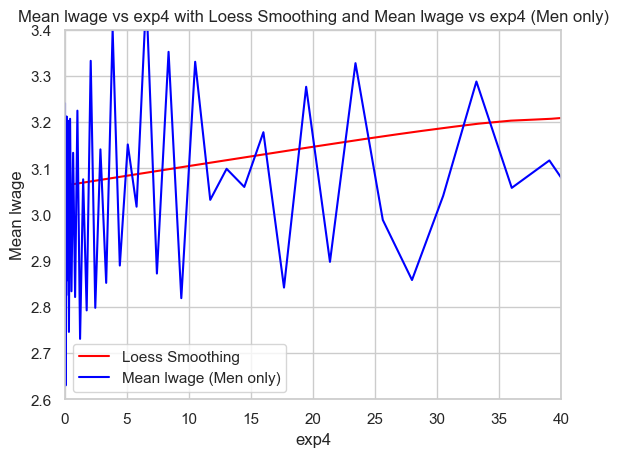

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generar valores de exp4 para predecir las medias de lwage con más puntos
exp4_seq = np.linspace(data['exp4'].min(), data['exp4'].max(), 500)

# Ajustar el modelo para mujeres
loess_model_women = sm.nonparametric.lowess(data[data['sex'] == 1]['lwage'], data[data['sex'] == 1]['exp4'], frac=0.9)

# Predecir las medias de lwage utilizando el modelo loess para mujeres
lwage_mean_pred_women = np.interp(exp4_seq, loess_model_women[:, 0], loess_model_women[:, 1])

# Calcular la media de lwage para cada valor único de exp4 solo para mujeres
mean_lwage_women = data[data['sex'] == 1].groupby('exp4')['lwage'].mean()

# Graficar la relación para mujeres
plt.plot(exp4_seq, lwage_mean_pred_women, color='red', label='Loess Smoothing')
plt.plot(mean_lwage_women.index, mean_lwage_women.values, color='blue', label='Mean lwage (Women only)')
plt.xlabel('exp4')
plt.ylabel('Mean lwage')
plt.title('Mean lwage vs exp4 with Loess Smoothing and Mean lwage vs exp4 (Women only)')
plt.legend()
plt.xlim(0, 40)
plt.ylim(2.6, 3.4)
plt.show()

# Ajustar el modelo para hombres
loess_model_men = sm.nonparametric.lowess(data[data['sex'] == 0]['lwage'], data[data['sex'] == 0]['exp4'], frac=0.9)

# Predecir las medias de lwage utilizando el modelo loess para hombres
lwage_mean_pred_men = np.interp(exp4_seq, loess_model_men[:, 0], loess_model_men[:, 1])

# Calcular la media de lwage para cada valor único de exp4 solo para hombres
mean_lwage_men = data[data['sex'] == 0].groupby('exp4')['lwage'].mean()

# Graficar la relación para hombres
plt.plot(exp4_seq, lwage_mean_pred_men, color='red', label='Loess Smoothing')
plt.plot(mean_lwage_men.index, mean_lwage_men.values, color='blue', label='Mean lwage (Men only)')
plt.xlabel('exp4')
plt.ylabel('Mean lwage')
plt.title('Mean lwage vs exp4 with Loess Smoothing and Mean lwage vs exp4 (Men only)')
plt.legend()
plt.xlim(0, 40)
plt.ylim(2.6, 3.4)
plt.show()

## **Cross-Validation in Lasso Regression - Manual Implementation Task**

In [18]:
# Libraries
import numpy as np
import pyreadr as rr
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, train_test_split

**1. Data Preparation**

Load the March Supplement of the U.S. Current Population Survey, year 2015. (wage2015_subsample_inference.Rdata)

In [6]:
rdata_read = rr.read_r("../../data/wage2015_subsample_inference.Rdata")
data = rdata_read['data']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5150 entries, 10 to 32643
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   wage    5150 non-null   float64 
 1   lwage   5150 non-null   float64 
 2   sex     5150 non-null   float64 
 3   shs     5150 non-null   float64 
 4   hsg     5150 non-null   float64 
 5   scl     5150 non-null   float64 
 6   clg     5150 non-null   float64 
 7   ad      5150 non-null   float64 
 8   mw      5150 non-null   float64 
 9   so      5150 non-null   float64 
 10  we      5150 non-null   float64 
 11  ne      5150 non-null   float64 
 12  exp1    5150 non-null   float64 
 13  exp2    5150 non-null   float64 
 14  exp3    5150 non-null   float64 
 15  exp4    5150 non-null   float64 
 16  occ     5150 non-null   category
 17  occ2    5150 non-null   category
 18  ind     5150 non-null   category
 19  ind2    5150 non-null   category
dtypes: category(4), float64(16)
memory usage: 736.3+ KB


In [8]:
# We choose the parameters from flexible model (includes interactions)
flex = 'lwage ~ sex + shs+hsg+scl+clg+occ2+ind2+mw+so+we + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)'
flex_results_0 = smf.ols(flex, data=data)

In [9]:
# Get exogenous variables from flexible model
X = flex_results_0.exog

# Set endogenous variable
y = data["lwage"]

In [10]:
# Separate the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [11]:
# Se estandariza la data
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

**2. Define a Range of Alpha (Lambda in our equation) Values**

We create a list or array of alpha values to iterate over. These will be the different regularization parameters we test. We started testing from 0.1 to 0.5 and found that the MSE in cross-validation was reducing when the alpha value was incrementing. Therefore, we tried with higher values.

In [12]:
alphas = [(45 + i * 5) for i in range(5)]

**3. Partition the Dataset for k-Fold Cross-Validation**

We divide the dataset into 5 subsets (or folds). Since we are working with a regression task (predicting the log of wage), we use the K-Fold cross-validator from sklearn. We ensure the data is shuffled by adding 'shuffle=True' and set a random state for a reproducible output.

Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [13]:
kf = KFold(n_splits=5, shuffle=True, random_state=24)

**4. Lasso Regression Implementation**

Implement a function to fit a Lasso Regression model given a training dataset and an alpha value. The function should return the model's coefficients and intercept.

In [14]:
def lasso_regression(X_train, y_train, alpha, iterations=100, learning_rate=0.01):
    """
    Fits a Lasso Regression model

    Args:
        X_train: Training features
        y_train: Target values
        alpha: Regularization parameter (L1 penalty)
        iterations: Number of iterations for gradient descent (default: 100)
        learning_rate: Learning rate for gradient descent (default: 0.01)

    Returns:
        W: Model coefficients (weights)
        b: Model intercept (bias)
    """
    m, n = X_train.shape
    W = np.zeros(n)
    b = 0

    for _ in range(iterations):
        Y_pred = X_train.dot(W) + b
        dW = np.zeros(n)
        for j in range(n):
            if W[j] > 0:
                dW[j] = (-2 * X_train[:, j].dot(y_train - Y_pred) + alpha) / m
            else:
                dW[j] = (-2 * X_train[:, j].dot(y_train - Y_pred) - alpha) / m
        db = -2 * np.sum(y_train - Y_pred) / m
        W -= learning_rate * dW
        b -= learning_rate * db

    return W, b

**5. Cross-Validation Loop and 6. Selection of Optimal Alpha**

We immplement a for loop to fit the lasso regression. Also, we find the best value of alpha that reduces the average MSE for each fold.

Alpha=45.0, Average MSE: 0.41942
Alpha=50.0, Average MSE: 0.41920
Alpha=55.0, Average MSE: 0.41912
Alpha=60.0, Average MSE: 0.41906
Alpha=65.0, Average MSE: 0.41907
Best Alpha: 60.0, Minimum Average MSE: 0.41906


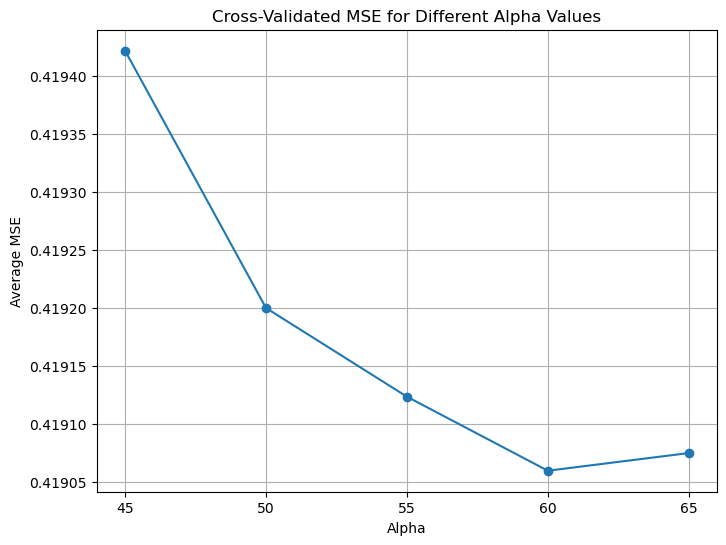

In [15]:
avg_mse_values = []
best_alpha = None
min_avg_mse = float('inf')

for alpha in alphas:
    mse_list = []  # Initialize an empty list to keep track of the MSE for each fold.
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Train Lasso regression model with the current alpha
        W, b = lasso_regression(X_train_fold, y_train_fold, alpha)
        y_pred_val = X_val_fold.dot(W) + b

        # Calculate MSE for this fold
        mse_fold = np.mean((y_val_fold - y_pred_val) ** 2)
        mse_list.append(mse_fold)

    # Calculate average MSE across all folds
    avg_mse = np.mean(mse_list)
    avg_mse_values.append(avg_mse)
    print(f"Alpha={alpha:.1f}, Average MSE: {avg_mse:.5f}")

    # Update the best alpha and minimum average MSE
    if avg_mse < min_avg_mse:
        min_avg_mse = avg_mse
        best_alpha = alpha

print(f"Best Alpha: {best_alpha:.1f}, Minimum Average MSE: {min_avg_mse:.5f}")

# Plotting the cross-validated MSE for each alpha value
plt.figure(figsize=(8, 6))
plt.plot(alphas, avg_mse_values, marker='o', linestyle='-')
plt.title('Cross-Validated MSE for Different Alpha Values')
plt.xlabel('Alpha')
plt.ylabel('Average MSE')
plt.xticks(alphas)
plt.grid(True)
plt.show()

**7. Model Training and Evaluation**

In [16]:
W, b = lasso_regression(X_train, y_train, best_alpha)
y_pred = X_test.dot(W) + b

In [20]:
lasso_corr = pearsonr(y_test, y_pred)[0]
lasso_mae = mean_absolute_error(y_test, y_pred)
lasso_mse = mean_squared_error(y_test, y_pred)

print(f"Correlation: {lasso_corr:.4f}")
print(f"MAE: {lasso_mae:.4f}")
print(f"MSE: {lasso_mse:.4f}")

Correlación: 0.5041
MAE: 0.4756
MSE: 0.3569


**8. Report Results**

We began by selecting the parameters for a flexible model, one that includes interactions. After selecting the parameters, we found that the alpha value that produced the lowest mean squared error (MSE) in cross-validation was 60. We then trained the model using all the available training data with the best alpha value. Using the fitted betas, we predicted the lwage using the test X vector. The resulting MSE in the test data was 0.3569, which was lower than in the training data (which was 0.41906). This indicates that the model is not overfitting and that we have found a good correlation score (R square) of 50%.